# Running a Random Forest - Assignment Week 2

To do's: The second assignment deals with Random Forests. Random forests are predictive models that allow for a data driven exploration of many explanatory variables in predicting a response or target variable. Random forests provide importance scores for each explanatory variable and also allow you to evaluate any increases in correct classification with the growing of smaller and larger number of trees.

Run a Random Forest.

You will need to perform a random forest analysis to evaluate the importance of a series of explanatory variables in predicting a binary, categorical response variable.

Random forest analysis was performed on gapminder.csv to evaluate importance of a series of explanatory variables in predicting a binary, categorical response variable. Random forests provide importance scores for each explanatory variable and also allow us to evaluate any increases in correct classification with the growing of smaller and larger number of trees.
The following explanatory variables were included as possible contributors to a random forest to evaluate my response variable breast cancer incidence (moderate/strong): income per person, alcohol consumption, CO2 emissions, female employ rate, life expectancy and urban rate.

In [206]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Load Feature Importance

In [207]:
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier

## Build model on training data


In [208]:
from sklearn.ensemble import RandomForestClassifier

## Data Management: Loading the GapMinder dataset 

In [209]:
def primary_clean(df, nan_subset = []):
    df = df.rename(columns=lambda x: x.strip()) #remove whitespaces from headers
    #delete all column with just NaN
    df = df.dropna(axis=1, how='all')
    #drop duplicates
    df = df.drop_duplicates()
    #drop compliance = NaN
    df = df.dropna(subset=nan_subset)
    #convert to numeric our objects
    df[nan_subset] = df[nan_subset].apply(pd.to_numeric, errors='coerce')
    return df

In [210]:
dfgm = pd.read_csv('gapminder.csv')

In [247]:
dfgm.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate          object
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                  object
internetuserate          object
lifeexpectancy          float64
oilperperson             object
polityscore              object
relectricperperson       object
suicideper100th          object
employrate               object
urbanrate               float64
breastcategories        float64
dtype: object

## Set my Features

In [248]:
#features to be convert to numeric
predictors = ['incomeperperson', 
                      'alcconsumption', 'co2emissions', 'femaleemployrate', 'lifeexpectancy', 'urbanrate']
other = ['breastcancerper100th']

In [249]:
other.extend(predictors)
dfgm = primary_clean(dfgm, other)

In [250]:
dfgm.dtypes

country                  object
incomeperperson         float64
alcconsumption          float64
armedforcesrate          object
breastcancerper100th    float64
co2emissions            float64
femaleemployrate        float64
hivrate                  object
internetuserate          object
lifeexpectancy          float64
oilperperson             object
polityscore              object
relectricperperson       object
suicideper100th          object
employrate               object
urbanrate               float64
breastcategories        float64
dtype: object

In [251]:
#grouping breast cancer(response variable) into 2 categories
dfgm['breastcategories'] = pd.cut(dfgm['breastcancerper100th'], bins=[1, 40, 102], labels=False)
labels = np.array('0_Moderate 1_Strong'.split())
dfgm['breastcategories'] = pd.to_numeric(dfgm['breastcategories'], errors='coerce')

In [252]:
dfgm.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,breastcategories
1,Albania,1914.996551,7.29,1.0247361,57.4,2.237473e+08,42.099998,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,1
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,0
4,Angola,1381.004268,5.57,1.4613288,23.1,2.483580e+08,69.400002,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.70,0
6,Argentina,10749.419238,9.35,.560987,73.9,5.872119e+09,45.900002,.5,36.0003349500148,75.901,.635943800978195,8,768.428299701347,7.765584,58.4000015258789,92.00,1
7,Armenia,1326.741757,13.66,2.6184384,51.6,5.121967e+07,34.200001,.1,44.0010245795602,74.241,,5,603.763057563433,3.74158787727356,40.0999984741211,63.86,1


In [253]:
#Because analyses cannot handle any NA’s in our data set, my next step is to create a clean 
#data frame that drops all NA’s. 
dfgm_clean = dfgm.dropna()
dfgm_clean.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,breastcategories
1,Albania,1914.996551,7.29,1.0247361,57.4,2.237473e+08,42.099998,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72,1
2,Algeria,2231.993335,0.69,2.306817,23.5,2.932109e+09,31.700001,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22,0
4,Angola,1381.004268,5.57,1.4613288,23.1,2.483580e+08,69.400002,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.70,0
6,Argentina,10749.419238,9.35,.560987,73.9,5.872119e+09,45.900002,.5,36.0003349500148,75.901,.635943800978195,8,768.428299701347,7.765584,58.4000015258789,92.00,1
7,Armenia,1326.741757,13.66,2.6184384,51.6,5.121967e+07,34.200001,.1,44.0010245795602,74.241,,5,603.763057563433,3.74158787727356,40.0999984741211,63.86,1


## Set Features Dataframe and Target

In [254]:
dfpredict = dfgm_clean[predictors]
targets = dfgm_clean.breastcategories

In [255]:
print(len(targets), len(dfgm_clean))

159 159


## Set out training and test datasets

In [256]:
#set the size ratio to 60% for the training sample and 40% for the test sample by indicating test_size=.4
pred_train, pred_test, tar_train, tar_test  =   train_test_split(dfpredict, targets, test_size=.4)

In [257]:
print('The shape of training predictor: {} and target: {}'.format(pred_train.shape, tar_train.shape))

The shape of training predictor: (95, 6) and target: (95,)


In [258]:
print('The shape of test predictor: {} and target: {}'.format(pred_test.shape, tar_test.shape))

The shape of test predictor: (64, 6) and target: (64,)


## Build adn fit  model RandomForestClassifier on training data

In [259]:
#n_estimators are the number of trees you would build with the random forest algorithm. 
rfc = RandomForestClassifier(n_estimators = 5).fit(pred_train,tar_train)

## Make prediction on just trained Model

In [260]:
#Next we include the predict function where we predict for the test values 
predictions=rfc.predict(pred_test)

In [261]:
#call in the confusion matrix function which we passed the target test
con_matrix = confusion_matrix(tar_test,predictions)

In [262]:
con_matrix

array([[41,  4],
       [ 4, 15]])

In [263]:
accuracy = accuracy_score(tar_test, predictions)

In [264]:
accuracy

0.875

In [265]:
# fit an Extra Trees model to the data
etc = ExtraTreesClassifier()
etc.fit(pred_train,tar_train)
# display the relative importance of each attribute
print(etc.feature_importances_)

[ 0.2375195   0.23695018  0.0764136   0.07331818  0.24032692  0.13547162]


## Impact of tree size on prediction accuracy

In [287]:
#To determine what growing larger number of trees has brought us in terms of correct classification. 
#We’re going to use code that builds for us different numbers of trees, from one to 25, and provides the correct classification rate for each.
trees = range(25)
accuracy = np.zeros(25)

In [288]:
for idx in range(len(trees)):
    rfc = RandomForestClassifier(n_estimators = idx + 1).fit(pred_train, tar_train)
    predictions = rfc.predict(pred_test)
    accuracy[idx] = accuracy_score(tar_test, predictions)

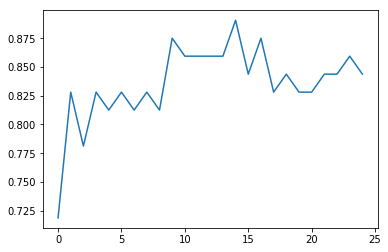

In [289]:
plt.cla()
plt.plot(trees,accuracy)
plt.show()

## Plot the feature importances of the forest

In [292]:
#standard deviations 
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)

In [293]:
std

array([ 0.1244575 ,  0.0716111 ,  0.03657124,  0.04123926,  0.14809768,
        0.09925147])

In [294]:
dictio = dict(zip(std, predictors))#dfpredict.columns))

In [295]:
dictio

{0.036571236193580117: 'co2emissions',
 0.041239264907628415: 'femaleemployrate',
 0.071611095346202761: 'alcconsumption',
 0.099251472641344096: 'urbanrate',
 0.12445749552260575: 'incomeperperson',
 0.14809768298112358: 'lifeexpectancy'}

In [302]:
indices = np.argsort(std)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(dfpredict.shape[1]):
    print("%d. feature %s (%f)" % (f , dictio[std[indices[f]]], std[indices[f]]))

Feature ranking:
0. feature lifeexpectancy (0.148098)
1. feature incomeperperson (0.124457)
2. feature urbanrate (0.099251)
3. feature alcconsumption (0.071611)
4. feature femaleemployrate (0.041239)
5. feature co2emissions (0.036571)


In [314]:
indices

array([4, 0, 5, 1, 3, 2])

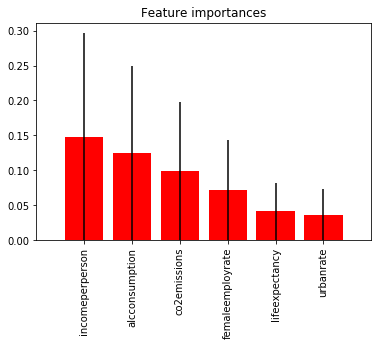

In [318]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(dfpredict.shape[1]), std[indices], color="r", yerr=std[indices], align="center")
plt.xticks( range(dfpredict.shape[1]), dictio.values(), rotation='vertical')
plt.xlim([-1, dfpredict.shape[1]])
plt.show()

## Data Analysis:

In confusion matrix, we see the true negatives and true positives on the diagonal. The 4 and the 4 represent the false negatives and false positives, respectively. The accuracy of the random forest was 0.875, which means that roughly 88% of the countries were classified correctly, as having a moderate or a strong breast cancer incidence. 
Given that we don’t interpret individual trees in a random forest, the most helpful information to be gotten from a forest is arguably the measured importance for each explanatory variable. The explanatory variables with the highest relative importance scores were, as expected, life expectancy (with 0.148098…) and incomeperson (with 0.124457…).
From the graph, it can be seen that the subsequent growing of multiple trees rather than a single tree, added considerably (approximately 5 p.p.) to the overall accuracy of the model, and suggesting that interpretation of a single decision tree may be inappropriate.